In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# load the Titanic dataset into a pandas DataFrame
df = pd.read_csv('/Users/jyothsnadevitiruveedhula/Downloads/titanic_dataset.csv')

In [2]:
# drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# convert categorical variables into numeric variables
df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True)
df = pd.get_dummies(df, columns=['Embarked'])


In [3]:
# split the data into training and testing datasets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# train the Random Forest classifier on the training dataset
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# make predictions on the testing dataset
y_pred = rf.predict(X_test)


In [5]:
# evaluate the performance of the classifier using accuracy and confusion matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.8044692737430168
Confusion Matrix:
 [[88 17]
 [18 56]]


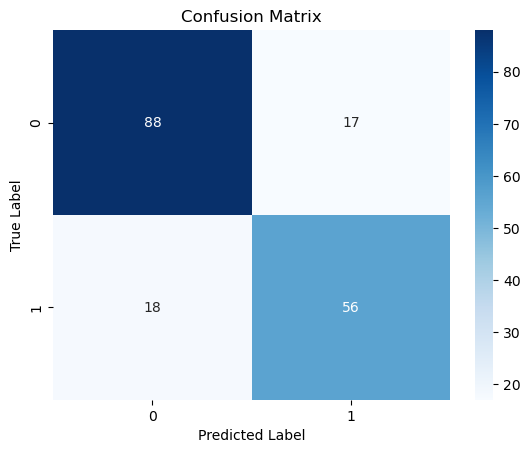

In [6]:
# visualize the training and testing dataset results using a heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
